In [1]:
import numpy as np
import pandas as pd
import matplotlib, matplotlib.pyplot as plt
import scipy
import scipy.optimize
from scipy.special import gammaln

def facln(n):
    return gammaln(n+1)

matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
def sample(n, l):
    return scipy.random.poisson(l, n)

In [3]:
def gen_lln(sample):
    n = len(sample)
    s = sum(sample)
    s_facln = sum(facln(m_j) for m_j in sample)
    def lln(l):
        return s*np.log(l) - s_facln - n*l 
    return lln

In [4]:
def estimate(sample, bounds=(0, 10**5)):
    lln = gen_lln(sample)
    neglln = lambda z: -lln(z)
    l_0 = scipy.optimize.minimize(
        neglln,
        1,
        method="l-bfgs-b",
        bounds=(bounds,)).x[0]
    return l_0

In [5]:
def test(n, l):
    s = sample(n, l)
    lln = gen_lln(s)
    l_0 = estimate(s, bounds=(0, l))
    ab = np.linspace(0, l*2, 2000)
    def plot_likelihoodln():
        plt.plot(ab, [lln(l) for l in ab])
        plt.scatter(l_0, lln(l_0))
        plt.show()
    def plot_likelihood():
        plt.plot(ab, [np.exp(lln(l)) for l in ab])
        plt.scatter(l_0, np.exp(lln(l_0)))
        plt.show()
    return (l_0, lln(l_0), plot_likelihoodln, plot_likelihood)

In [6]:
l_0, lln_0, plotln, plotl = test(n=256, l=3)
print(l_0)

3.0


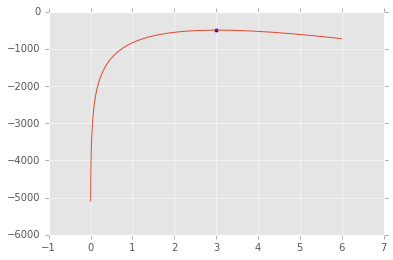

In [7]:
plotln()

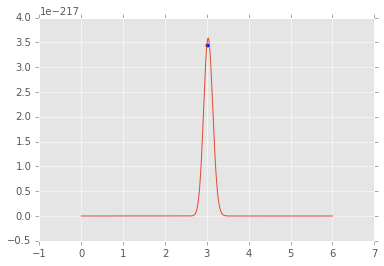

In [8]:
plotl()

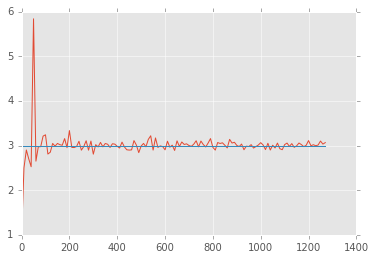

In [9]:
nn = list(10*k for k in range(128))
ll = [estimate(sample(n, 3)) for n in nn]
# estimate for sampes of different size
plt.plot(nn, ll)
# l=3 is the correct one
plt.plot(nn, [3 for _ in nn])

In [10]:
def max_likelihoodln(sample, bounds=(0, 10**5)):
    lln = gen_lln(sample)
    l_0 = estimate(sample, bounds)
    return lln(l_0)
nn = list(10*k for k in range(92))

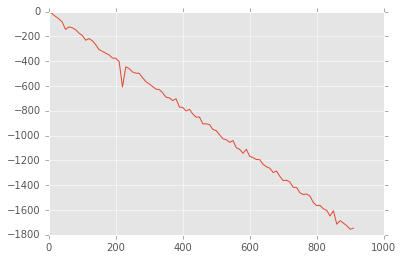

In [11]:
plt.plot(nn, [max_likelihoodln(sample(n, 3)) for n in nn])

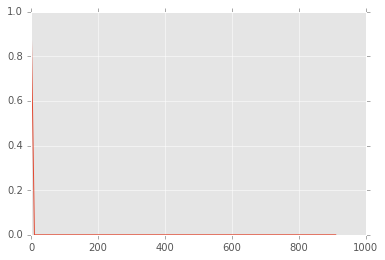

In [12]:
plt.plot(nn, [np.exp(max_likelihoodln(sample(n, 3))) for n in nn])